# Travel Insurance Prediction
#### Goal: Predict Whether A Given Customer Would Like To Buy The Insurance Package.
## 1) Exploratory Data Analysis  
- **Understanding Data**  
- **Statistical summaries and charts**  
- **Testing for anomalies/Outliers**  
- **Checking for correlations**  
- **Other relations between variables**  
- **Other EDA elements**  

## 2) Statistical Inference  
- **Defining Target Population**  
- **Forming multiple statistical hypotheses**  
- **Constructing confidence intervals**  
- **Setting significance levels**  
- **Conducting Z-test or T-tests for these hypotheses**  

## 3) Machine Learning Models  
- **Apply various ML models to predict Travel Insurance column**  
- **Using other features including Hyperparameter Tuning, Model ensembling, analysis of model selection, and other methods**  

## 4) Conclusions  

## 5) Future Improvements  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

from scipy.stats import ttest_ind
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve


np.random.seed(10)


warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv", index_col=0)

## Understanding Data

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1987, 9)


In [4]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.isna().any().any() #handling missing values

False

There are no missing values in the dataset.
Meaning there are 1987 rows given.

In [6]:
df.duplicated().sum()

738

Since we have a total of **1,987 rows** and **738 duplicate values**, we will retain the duplicate values for now instead of removing them.

In [7]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

In [8]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [9]:
for col in df.columns:
    print(f'Distinct values for "{col}" are: {df[col].unique()}\n')

Distinct values for "Age" are: [31 34 28 25 33 26 32 29 35 30 27]

Distinct values for "Employment Type" are: ['Government Sector' 'Private Sector/Self Employed']

Distinct values for "GraduateOrNot" are: ['Yes' 'No']

Distinct values for "AnnualIncome" are: [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]

Distinct values for "FamilyMembers" are: [6 7 4 3 8 9 5 2]

Distinct values for "ChronicDiseases" are: [1 0]

Distinct values for "FrequentFlyer" are: ['No' 'Yes']

Distinct values for "EverTravelledAbroad" are: ['No' 'Yes']

Distinct values for "TravelInsurance" are: [0 1]



In [10]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

# Features Overview

## Categorical Features:
- **Employment Type**
- **Graduate or Not**
- **Chronic Diseases** - Does the client have any chronic diseases? (`0` for No, `1` for Yes)
- **Frequent Flyer**
- **Ever Travelled Abroad**
- **Travel Insurance** - Does the client have travel insurance? (`0` for No, `1` for Yes)

## Numerical Features:
- **Age**
- **Annual Income**
- **Family Members** - Family member count


## Statistical Summaries and Charts

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


## Visualizing numerical feature distributions

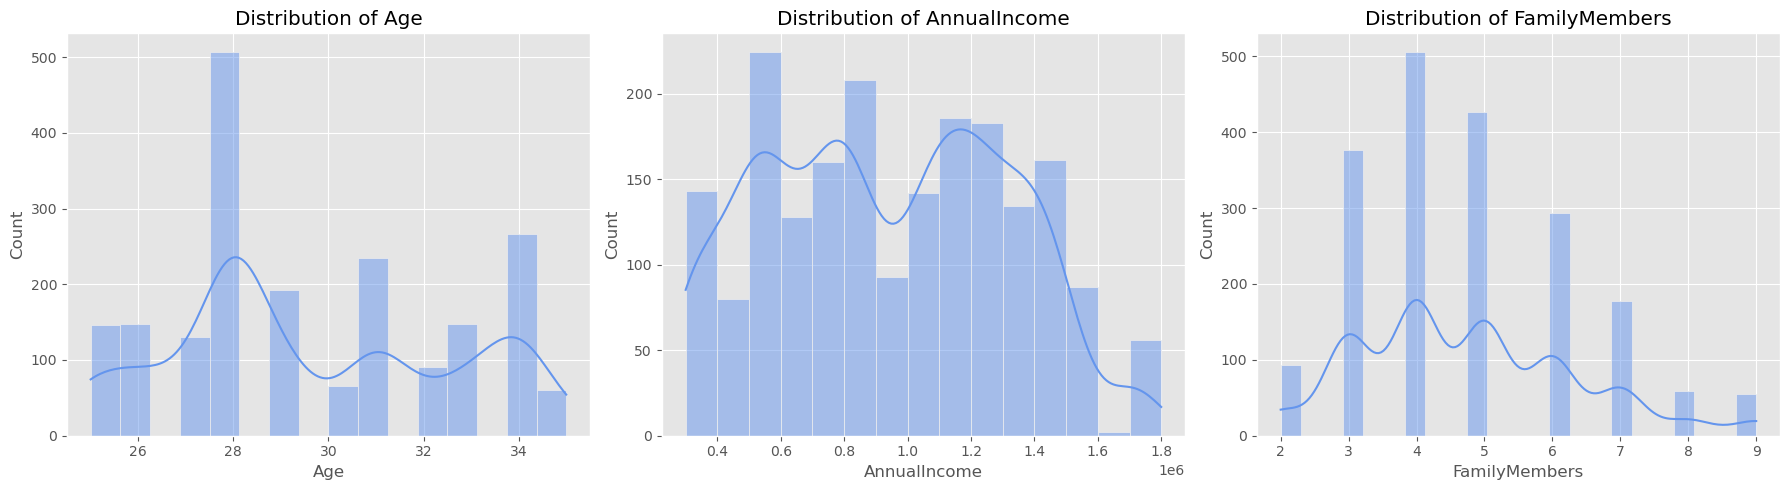

In [12]:

# Define the numerical features
numerical_features = ['Age', 'AnnualIncome', 'FamilyMembers']

# Plot histograms
plt.figure(figsize=(18, 5))

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


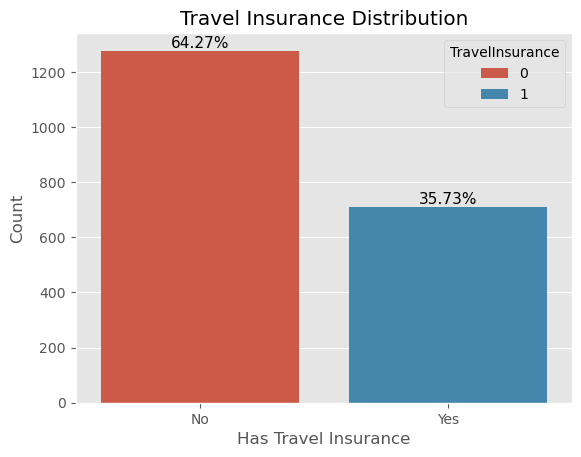

In [13]:
total = len(df)
insurance_counts = df['TravelInsurance'].value_counts().sort_index()
insurance_percent = (insurance_counts / total * 100).round(2)

ax = sns.countplot(
    data=df,
    x='TravelInsurance',
    hue='TravelInsurance'
)

plt.title('Travel Insurance Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('Has Travel Insurance')

for p, perc in zip(ax.patches, insurance_percent):
    height = p.get_height()
    ax.annotate(f'{perc}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=11)

plt.show()

We can observe that the number of clients who have Travel Insurance is approximately half the number of those who do not. 
This indicates that the classes are slightly imbalanced.

## Lets Visualize other features with our Target Variable (Travel Insurance)

#### Age Distribution with Travel Insurance

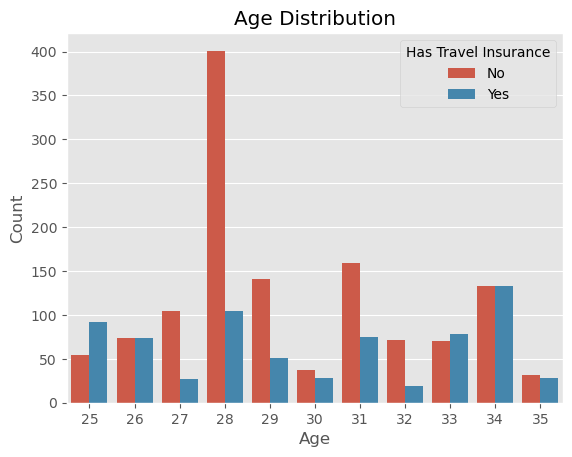

In [14]:
ax= sns.countplot(
    data=df,
    x='Age',
    hue='TravelInsurance'
)

plt.title('Age Distribution')

plt.legend(title='Has Travel Insurance', labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()


##### Age Distribution and Travel Insurance Insights

- Most of the clients are **28 years old**.
- For clients aged **26** and **33 or older**, the distribution of Travel Insurance is relatively **balanced**.
- Interestingly, at the age of **25**, there is a noticeable increase in the number of clients who **have Travel Insurance** compared to those who don't.

#### Employment Type with Travel Insurance

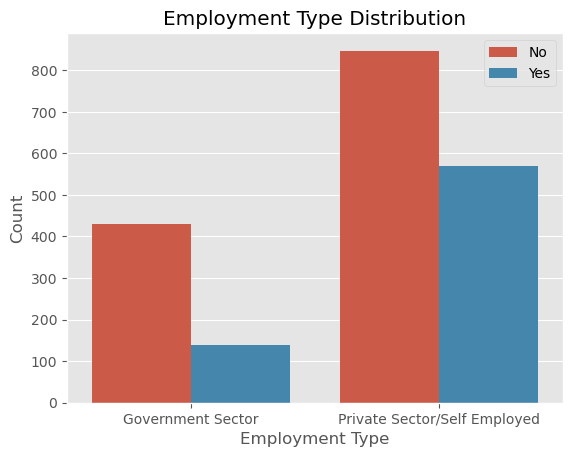

In [15]:
sns.countplot(
    data=df,
    x='Employment Type',
    hue='TravelInsurance'
)

plt.title('Employment Type Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

##### Employment Sector and Travel Insurance Insights
- A larger number of clients are employed in the **private sector**.
- In both the **private** and **public sectors**, there are more individuals without **Travel Insurance**.
- However, the **private sector** shows a higher **rate** of clients with **Travel Insurance** compared to the public sector.

#### Graduation with Travel Insurance

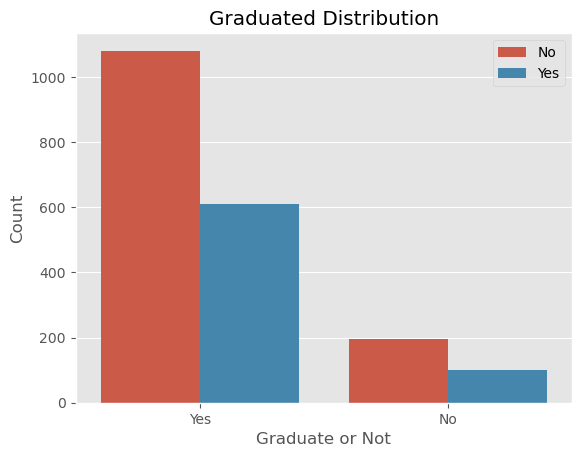

In [16]:
sns.countplot(
    data=df,
    x='GraduateOrNot',
    hue='TravelInsurance'
)

plt.title('Graduated Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Graduate or Not')

plt.show()

##### Education Level and Travel Insurance Insights

- A larger number of clients are **graduates**.
- The rates of having **Travel Insurance** are quite similar for both education levels, with those having insurance being approximately **half** the number of those without it.


#### Annual Income with Travel Insurance

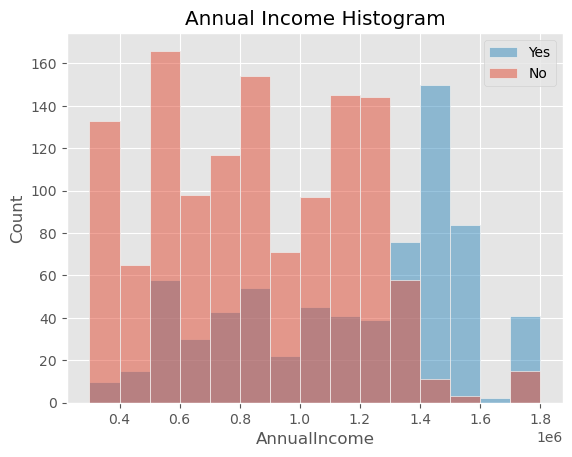

In [17]:
sns.histplot(
    data=df,
    x='AnnualIncome',
    hue='TravelInsurance'
)

plt.title('Annual Income Histogram')

plt.legend(labels=['Yes', 'No'])

plt.ylabel('Count')

plt.show()

##### Income Level and Travel Insurance Insights

- Clients with **higher income levels** are more likely to have **Travel Insurance**.
- This suggests a potential correlation between wealth and the likelihood of purchasing travel insurance, as individuals with higher annual incomes may have more disposable income to invest in such coverage.
- In contrast, clients with lower income levels seem to have a lower propensity for purchasing Travel Insurance, possibly due to financial constraints or other factors affecting their purchasing decisions.


#### Family Members with Travel Insurance

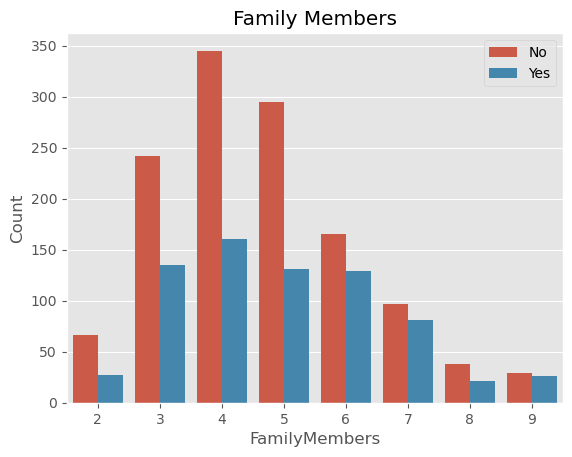

In [18]:
sns.countplot(
    data=df,
    x='FamilyMembers',
    hue='TravelInsurance'
)

plt.title('Family Members')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

##### Family Size and Travel Insurance Insights

- The majority of clients have a family of **4 members** (typically consisting of a husband, wife, and two children).
- Interestingly, **Travel Insurance** is more prevalent among families with **more members**.


#### Chronic Diseases with Travel Insurance

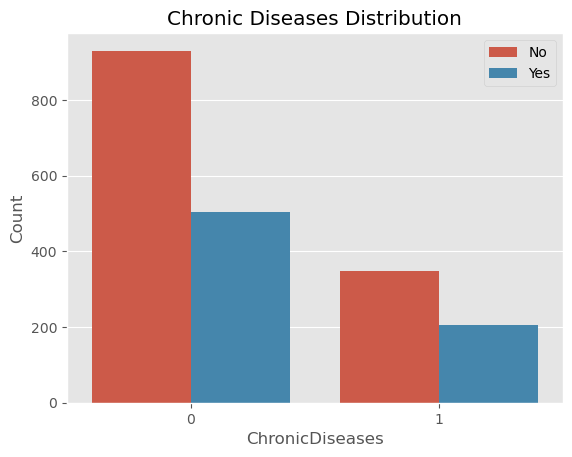

In [19]:
sns.countplot(
    data=df,
    x='ChronicDiseases',
    hue='TravelInsurance'
)

plt.title('Chronic Diseases Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')

plt.show()

##### Chronic Diseases and Travel Insurance Insights

- The **rate of having Travel Insurance** is higher among individuals with **Chronic Diseases**.
- However, there are **more clients without chronic diseases** who do not have Travel Insurance.


#### Frequent flyers with Travel Insurance

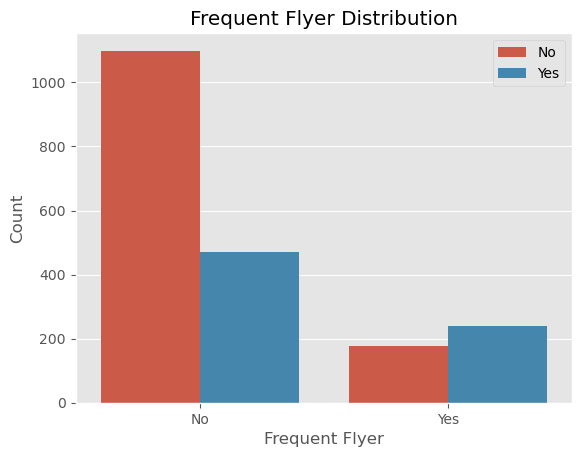

In [20]:
sns.countplot(
    data=df,
    x='FrequentFlyer',
    hue='TravelInsurance'
)

plt.title('Frequent Flyer Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Frequent Flyer')

plt.show()

##### Flight Frequency and Travel Insurance Insights

- **Frequent flyers** are more likely to have **Travel Insurance**.
- Over **half of the non-frequent flyers** do not have **Travel Insurance**.


#### Ever Travelled Abroad with Travel Insurance

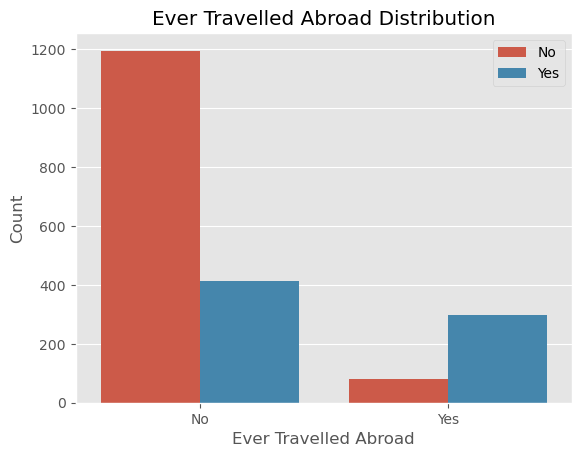

In [21]:
sns.countplot(
    data=df,
    x='EverTravelledAbroad',
    hue='TravelInsurance'
)

plt.title('Ever Travelled Abroad Distribution')

plt.legend(labels=['No', 'Yes'])

plt.ylabel('Count')
plt.xlabel('Ever Travelled Abroad')

plt.show()


##### Travel History and Travel Insurance Insights

- **More people have never traveled abroad**, and the majority of them do not have **Travel Insurance**.
- Among those who have traveled abroad, around **four-fifths** have **Travel Insurance**.


#### Age by Annual Income

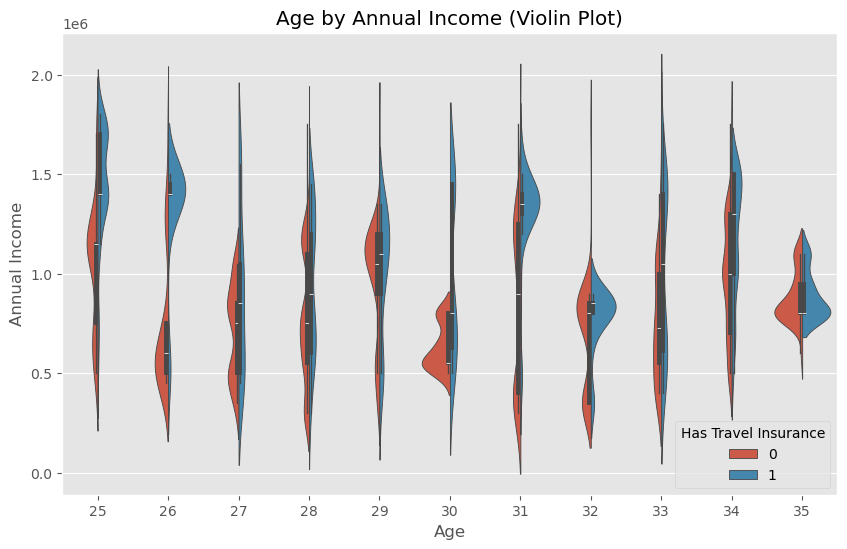

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Age', y='AnnualIncome', hue='TravelInsurance', split=True)

plt.title('Age by Annual Income (Violin Plot)')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend(title='Has Travel Insurance')

plt.show()


### Age vs. Annual Income Scatter Plot Insights

- The Violin plot shows the distribution of annual income across different age groups, where wider sections indicate higher data density.
- Some age groups (e.g., 30-32) show noticeable differences in income distribution, and certain groups have a wider spread, indicating higher variability in earnings.

#### Age by Family Member Count

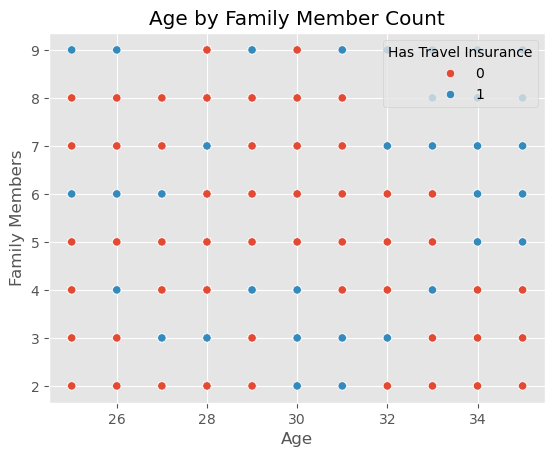

In [23]:
sns.scatterplot(data=df, x='Age', y='FamilyMembers', hue='TravelInsurance')

plt.title('Age by Family Member Count')

plt.legend(title='Has Travel Insurance')

plt.ylabel('Family Members')

plt.show()

##### Age vs. Family Member Count Insights

- There is no clear pattern between **age** and **family member count**.
- However, it's noticeable that there are more **red dots** (representing clients without Travel Insurance) than **blue dots** (representing clients with Travel Insurance), which aligns with the overall distribution of insurance status.


#### Annual Income by Family Member Count

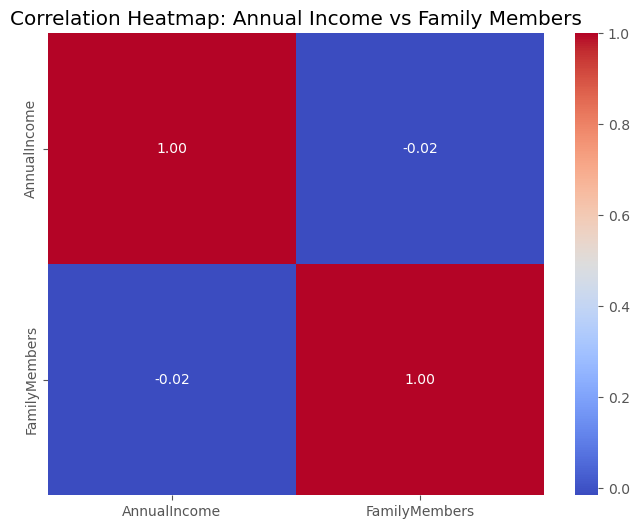

In [24]:
corr = df[['AnnualIncome', 'FamilyMembers']].corr() 

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap: Annual Income vs Family Members')
plt.show()


##### Annual Income vs. Family Member Count Insights

- Annual Income and Family Members have almost no correlation (-0.02).
- This means that the number of family members does not significantly impact annual income.

### Employment Type by Annual Income

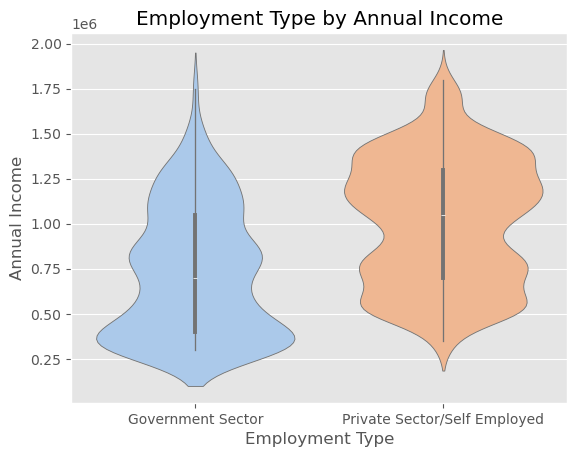

In [25]:
sns.violinplot(data=df, x='Employment Type', y='AnnualIncome', palette="pastel")

plt.title('Employment Type by Annual Income')

plt.ylabel('Annual Income')

plt.show()

Private sector has higher Annual Income.

#### Graduated by Annual Income

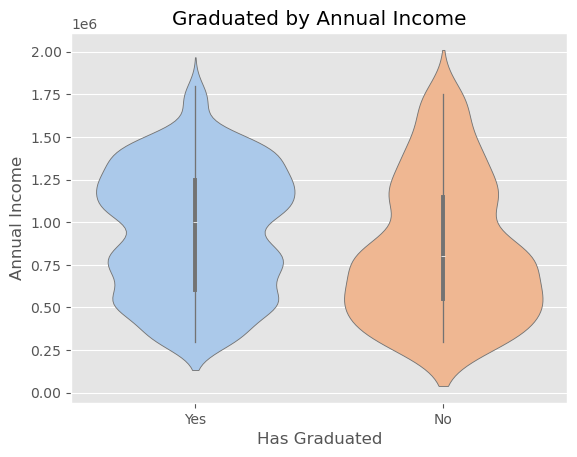

In [26]:
sns.violinplot(data=df, x='GraduateOrNot', y='AnnualIncome', palette="pastel")

plt.title('Graduated by Annual Income')

plt.ylabel('Annual Income')
plt.xlabel('Has Graduated')

plt.show()

### Education Level and Annual Income Insights

- On average, individuals who have **graduated** tend to have **higher annual incomes**.
- However, the group of individuals who have **not graduated** shows a **wider range of incomes**, with their **maximum income** exceeding that of the graduated group.


In [27]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outlier_list = []

for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    outlier_list.append({
        'Feature': feature,
        'Num_Outliers': outliers.shape[0]
    })

outlier_summary = pd.DataFrame(outlier_list)

print(outlier_summary.sort_values(by='Num_Outliers', ascending=False))

           Feature  Num_Outliers
0              Age             0
1     AnnualIncome             0
2    FamilyMembers             0
3  ChronicDiseases             0
4  TravelInsurance             0


We performed outlier detection using the **Interquartile Range (IQR)** method across all numerical features. Below is a summary of the number of outliers detected for each feature,

#### Observations:
- **No outliers were detected** in any of the numerical features based on the IQR method.
- It's important to note that **`ChronicDiseases`** and **`TravelInsurance`** are **categorical features**, where:
  - `0` indicates **NO**
  - `1` indicates **YES**
-Since these are categorical, outlier detection methods like IQR aren't typically applicable to them. However, they were included here to ensure data consistency.
-For better understanding and visual confirmation, we will visualize these features using boxplots and distribution plots to ensure there are no extreme or unusual values present.


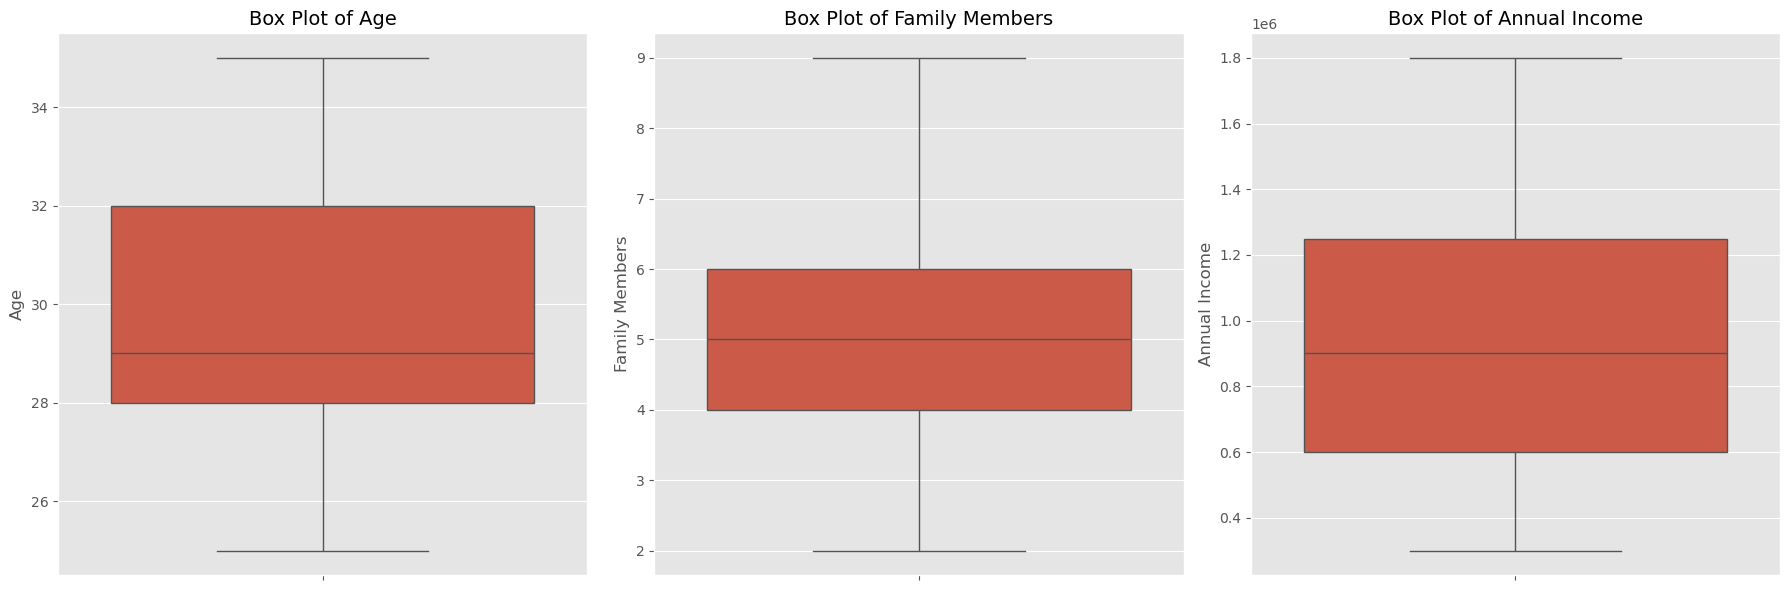

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(data=df, y='Age', ax=axes[0])
axes[0].set_title('Box Plot of Age', fontsize=14)
axes[0].set_ylabel('Age', fontsize=12)

sns.boxplot(data=df, y='FamilyMembers', ax=axes[1])
axes[1].set_title('Box Plot of Family Members', fontsize=14)
axes[1].set_ylabel('Family Members', fontsize=12)

sns.boxplot(data=df, y='AnnualIncome', ax=axes[2])
axes[2].set_title('Box Plot of Annual Income', fontsize=14)
axes[2].set_ylabel('Annual Income', fontsize=12)

plt.tight_layout()
plt.show()

**As identified using the IQR method, no outliers were detected in any of the numerical features.**

### 3. Statistical Inference

## Target Population & Hypotheses

### Target Population:
We define the **target population** as all individuals in the dataset who are part of the Travel Insurance prediction study. Specifically:

**Target Population**: "The population of customers who either purchased or did not purchase travel insurance."

### Hypotheses:
For our hypothesis testing, we can consider comparing different groups based on key variables like **Age** or **Annual Income** and how these relate to purchasing travel insurance.

#### Hypothesis 1: Age and Travel Insurance
- **Null Hypothesis (H₀)**: There is no significant difference in the average **Age** of individuals who purchased travel insurance versus those who did not.  
  
- **Alternative Hypothesis (H₁)**: There is a significant difference in the average **Age** of individuals who purchased travel insurance versus those who did not.  

#### Hypothesis 2: Annual Income and Travel Insurance
- **Null Hypothesis (H₀)**: There is no significant difference in the average **Annual Income** of individuals who purchased travel insurance versus those who did not.  

- **Alternative Hypothesis (H₁)**: There is a significant difference in the average **Annual Income** of individuals who purchased travel insurance versus those who did not.  

In [29]:
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)  
    ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return ci

variables = ['Age', 'AnnualIncome', 'FamilyMembers']  

confidence_intervals = {}

for var in variables:
    ci = calculate_confidence_interval(df[var].dropna()) 
    confidence_intervals[var] = ci

# Displaying the confidence intervals
for var, ci in confidence_intervals.items():
    print(f"95% Confidence Interval for {var}: {ci}")


95% Confidence Interval for Age: (29.52205234694126, 29.778400597195635)
95% Confidence Interval for AnnualIncome: (916182.7889600248, 949343.1295100305)
95% Confidence Interval for FamilyMembers: (4.682075542725618, 4.823712076801307)


In [30]:
age_with_insurance = df[df['TravelInsurance'] == 1]['Age'].dropna()
age_without_insurance = df[df['TravelInsurance'] == 0]['Age'].dropna()

t_stat, p_value = ttest_ind(age_with_insurance, age_without_insurance, equal_var=False)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ Reject null hypothesis: There is a significant difference in Age between insured and non-insured customers.")
else:
    print("❌ Fail to reject null hypothesis: There is no significant difference in Age between insured and non-insured customers.")


T-statistic: 2.5542, P-value: 0.0108
✅ Reject null hypothesis: There is a significant difference in Age between insured and non-insured customers.


In [31]:
income_with_insurance = df[df['TravelInsurance'] == 1]['AnnualIncome'].dropna()
income_without_insurance = df[df['TravelInsurance'] == 0]['AnnualIncome'].dropna()

t_stat_income, p_value_income = ttest_ind(income_with_insurance, income_without_insurance, equal_var=False)

print(f"T-statistic for Annual Income: {t_stat_income:.4f}, P-value: {p_value_income:.4f}")
if p_value_income < 0.05:
    print("✅ Reject null hypothesis: There is a significant difference in Annual Income between insured and non-insured customers.")
else:
    print("❌ Fail to reject null hypothesis: There is no significant difference in Annual Income between insured and non-insured customers.")


T-statistic for Annual Income: 18.5557, P-value: 0.0000
✅ Reject null hypothesis: There is a significant difference in Annual Income between insured and non-insured customers.


After performing hypothesis tests (t-test), we will use a significance level (α) of 0.05 to determine whether to reject or fail to reject the null hypothesis.

If the p-value < α (0.05): Reject the null hypothesis (indicating a significant difference between groups).
If the p-value ≥ α (0.05): Fail to reject the null hypothesis (indicating no significant difference between groups).

## Data Preparation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
cols = ['FrequentFlyer', 'EverTravelledAbroad', 'GraduateOrNot']

for col in cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Employment Type'] = df['Employment Type'].map({'Government Sector': 0, 'Private Sector/Self Employed': 1})

Since all of the features have only two classes, there's no need for encoding; we can directly convert the categorical values to 0 and 1.

In [34]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


### Correlations with Travel Insurance

In [35]:
corr_matrix = df[df.dtypes[df.dtypes == 'int64'].index].corr()
corr_matrix['TravelInsurance'].sort_values(ascending=False)

TravelInsurance        1.000000
EverTravelledAbroad    0.433183
AnnualIncome           0.396763
FrequentFlyer          0.232103
Employment Type        0.147847
FamilyMembers          0.079909
Age                    0.061060
GraduateOrNot          0.018934
ChronicDiseases        0.018190
Name: TravelInsurance, dtype: float64

In [36]:
df.dtypes

Age                    int64
Employment Type        int64
GraduateOrNot          int64
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int64
EverTravelledAbroad    int64
TravelInsurance        int64
dtype: object

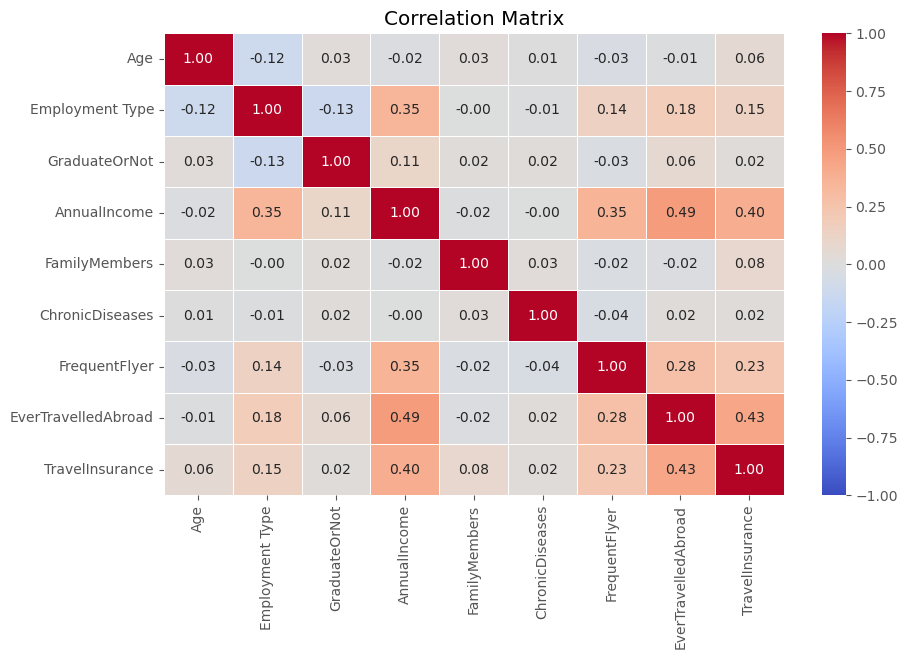

In [37]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['TravelInsurance']

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
            vmax=1, vmin=-1) 

plt.title('Correlation Matrix')
plt.show()

### Key Correlation Insights

- **EverTravelledAbroad (0.43)** and **AnnualIncome (0.40)** show the strongest correlations with **TravelInsurance**, suggesting that individuals who have traveled abroad and those with higher incomes are more likely to purchase travel insurance.
- Features like **Age**, **GraduateOrNot**, and **ChronicDiseases** have weak or negligible correlations with **TravelInsurance**, indicating that these factors may have little to no impact on the likelihood of purchasing insurance.
- Given the stronger correlations with **AnnualIncome** and **EverTravelledAbroad**, these features appear to be more important for predictive modeling. However, further feature engineering or transformations could be explored to improve model performance.

#### 🎯 Action Points:
- ✅ After training the models, perform **feature importance analysis** (especially for tree-based models) to validate whether the low-correlation features (like **Age** and **ChronicDiseases**) are contributing meaningfully or if they can be dropped to simplify the model.

## Implementing Machine Learning Models

#### Data Preprocessing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Training

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
XGBoost trained.


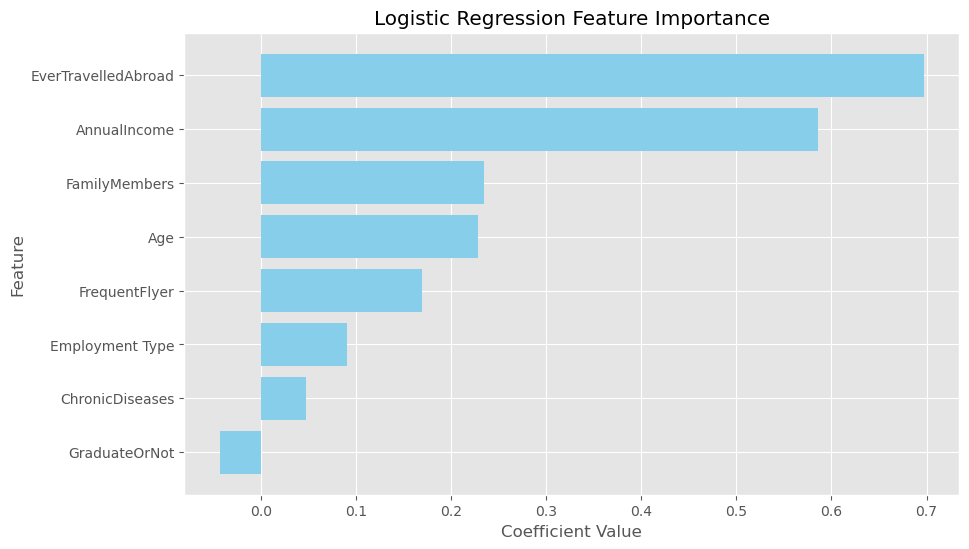

In [40]:
feature_names = X.columns
log_reg_model = models['Logistic Regression']  # Assuming the model is stored in the dictionary
coefficients = log_reg_model.coef_[0]

sorted_idx = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], [coefficients[i] for i in sorted_idx], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()  
plt.show()


- "EverTravelledAbroad" has the highest positive impact, meaning people who have traveled abroad are significantly more likely to be classified as positive (e.g., purchasing travel insurance).
- "AnnualIncome" also plays a major role, suggesting that income influences the likelihood of purchasing insurance.
- "FamilyMembers" and "Age" are moderately important, indicating that household size and age affect predictions.
- Features like "GraduateOrNot" and "ChronicDiseases" have the least impact, suggesting they contribute minimally to the model's decision-making.

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print("Stratified K-Fold accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Stratified K-Fold accuracy scores: [0.81132075 0.80503145 0.82704403 0.78301887 0.80757098]
Mean accuracy: 0.8067972144515207


- The Stratified K-Fold cross-validation method splits the dataset into 5 folds, maintaining class distribution in each fold. This provides a more reliable estimate of the model's performance compared to a single train-test split. The accuracy scores across the 5 folds were: [0.8113, 0.8050, 0.8270, 0.7830, 0.8076], with a mean accuracy of 80.68%.

- Cross-validation reduces the risk of overfitting by ensuring that the model is evaluated on multiple subsets of the data. The consistent performance (±0.04 variation) across the folds indicates that the model is stable and generalizes well to unseen data, making the results more trustworthy.

To ensure our model's performance is reliable and generalizes well, we applied cross-validation. The consistent results across multiple folds increase our confidence in the model's robustness and reduce the likelihood of overfitting

- Unlike XGBoost, which is already quite optimized and sensitive to hyperparameters, Random Forest is simpler to tune and interpret, making it an ideal starting point.
- After tuning Random Forest, I can compare the optimized version with XGBoost and then decide if tuning XGBoost is also necessary.

#### HyperParameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


#### Model Ensembling

In [43]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', models['XGBoost'])
], voting='soft')

ensemble_model.fit(X_train, y_train)
print('Ensemble model trained.')

Ensemble model trained.


#### Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'### {name} Performance ###')
    print(classification_report(y_test, y_pred))
    print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred)}')
    print('\n' + '-'*50 + '\n')

### Logistic Regression Performance ###
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       256
           1       0.75      0.51      0.61       142

    accuracy                           0.76       398
   macro avg       0.76      0.71      0.72       398
weighted avg       0.76      0.76      0.75       398

ROC-AUC Score: 0.7066461267605634

--------------------------------------------------

### Decision Tree Performance ###
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       256
           1       0.70      0.54      0.61       142

    accuracy                           0.75       398
   macro avg       0.74      0.71      0.71       398
weighted avg       0.75      0.75      0.74       398

ROC-AUC Score: 0.7051056338028169

--------------------------------------------------

### Random Forest Performance ###
              precision    recall  f1-score   support

         

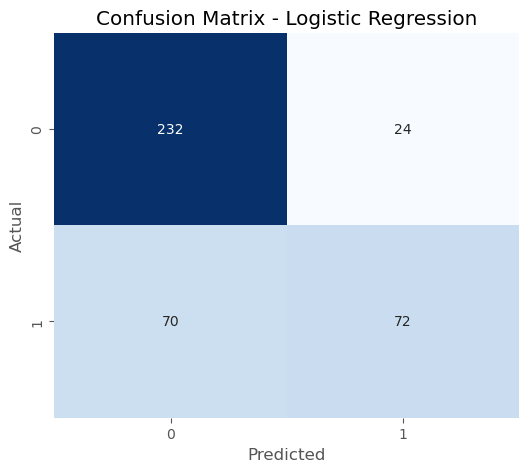

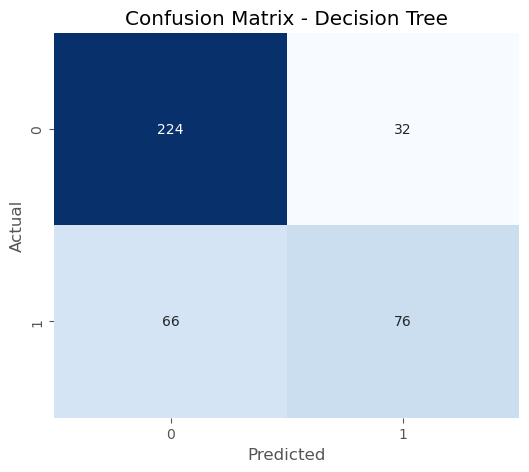

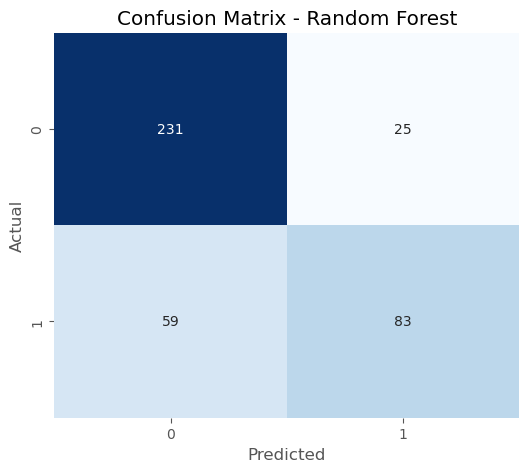

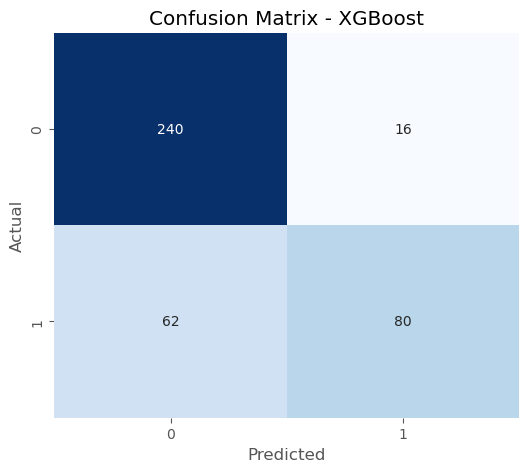

In [45]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- Logistic Regression has a relatively high number of false negatives (70), indicating that the model has trouble predicting the positive class.
- Decision Tree slightly improves, but still misclassifies a significant number of positive instances (66 FN).
- Random Forest improves on the previous models, reducing false negatives (59 FN) and maintaining a better balance between true positives and false positives.
- XGBoost performs the best, with 80 true positives and a relatively low false negative count (62). This model appears to strike the best balance between precision and recall for the minority class.

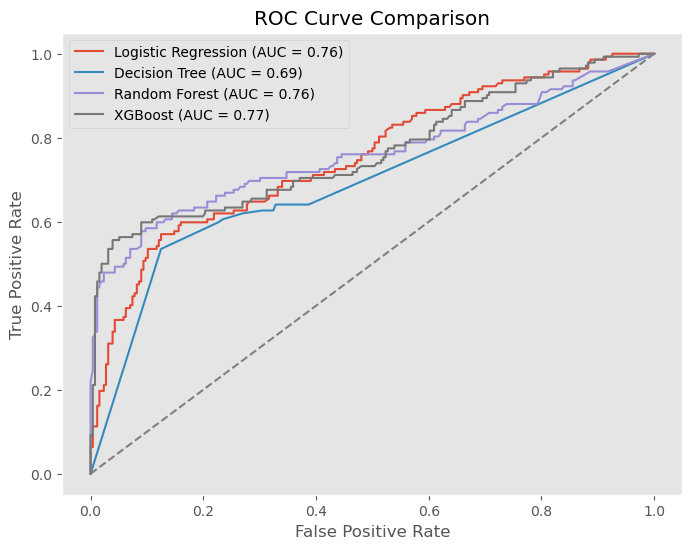

In [46]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    
    for model_name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]  
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curves(models, X_test, y_test)

- XGBoost is the best model based on AUC, followed closely by Random forest and logistic regression
- The Decision tree underperforms, suggesting it may require tuning to improve generalization.

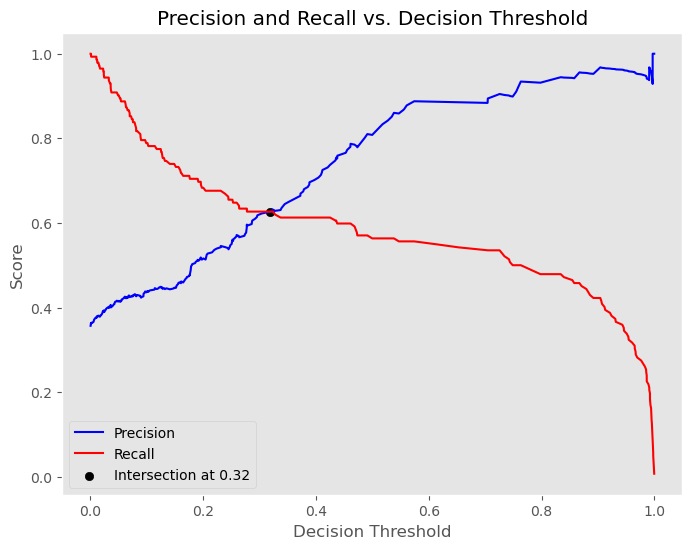

Intersection Point: Threshold = 0.32, Precision = Recall = 0.63


In [47]:
def plot_precision_recall_vs_threshold(y_test, y_pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    abs_diff = np.abs(precision - recall)
    min_diff_index = np.argmin(abs_diff)
    intersection_threshold = thresholds[min_diff_index]
    intersection_precision = precision[min_diff_index]
    intersection_recall = recall[min_diff_index]

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision[:-1], label="Precision", color='blue')
    plt.plot(thresholds, recall[:-1], label="Recall", color='red')

    plt.scatter(intersection_threshold, intersection_precision, color='black', marker='o', label=f'Intersection at {intersection_threshold:.2f}')
    
    plt.xlabel("Decision Threshold")
    plt.ylabel("Score")
    plt.title("Precision and Recall vs. Decision Threshold")
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Intersection Point: Threshold = {intersection_threshold:.2f}, Precision = Recall = {intersection_precision:.2f}")
y_pred_proba = model.predict_proba(X_test)[:, 1]  

plot_precision_recall_vs_threshold(y_test, y_pred_proba)

### Model Selection Analysis

After evaluating all trained models using accuracy, F1-score, and ROC-AUC on the test set, the following insights guided the model selection:

#### Model Performance Summary:
- **Logistic Regression** and **Decision Tree** achieved lower ROC-AUC scores (0.70), with weaker recall and F1-scores, especially on the positive class (customers who purchase insurance).
- **Random Forest** and **XGBoost** outperformed the other models, achieving higher accuracy (79-80%) and better ROC-AUC scores (0.74–0.75), indicating stronger overall performance.

#### Model Selection Decisions:
- **Hyperparameter Tuning**:  
  Random Forest was chosen for hyperparameter tuning due to its strong baseline performance and flexibility in handling various data types without extensive preprocessing.

- **Voting Classifier (Ensemble)**:  
  The two best-performing models — **Random Forest** and **XGBoost** — were combined in a soft-voting ensemble to leverage the strengths of both models and further improve predictive accuracy.

These decisions were based on the comparative evaluation of the models' performance metrics, prioritizing those with higher ROC-AUC and balanced class performance to ensure reliable predictions.


### **Conclusion**
- **Best Model**: 
    - XGBoost is the best performing model, achieving the highest accuracy of **80%** and the best ROC-AUC score of **0.75**. Given these metrics, XGBoost is likely the best choice for predicting whether a user will purchase travel insurance.
- **Model Comparison**: 
    - **Random Forest** also performs well with an accuracy of **79%** and a ROC-AUC score of **0.74**, but XGBoost slightly outperforms it.
    - **Logistic Regression** and **Decision Tree** show more moderate performance with accuracies of **76%** and **75%**, respectively, and lower ROC-AUC scores compared to XGBoost and Random Forest.
- **Next Steps**: 
    - Since XGBoost offers the best performance, it would be advisable to further **tune its hyperparameters** to improve the model's accuracy and robustness.
    - Additionally, exploring **model ensembling** techniques could help combine the strengths of different models (e.g., combining XGBoost with Random Forest) to further improve results.

### **Future Improvements**  

1. **Enhanced Feature Engineering & Model Optimization**  
   - Investigate feature interactions, apply dimensionality reduction techniques (e.g., PCA), and experiment with polynomial features.  
   - Optimize models using Bayesian hyperparameter tuning, stacking, and deep learning approaches.  
   - Create an additional dataset without duplicates for comparative analysis.  

2. **Model Interpretability, Performance Enhancement & Deployment**  
   - Tackle class imbalance using resampling techniques and validate models across different datasets.  
   - Deploy optimized models with Flask or FastAPI and integrate automated real-time data pipelines.